In [ ]:
!pip install streamlit fbprophet yfinance plotly

import necessary libraries

In [1]:
import streamlit as st
import yfinance as yf
from fbprophet import Prophet
from datetime import date
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go

establish dates and times

[*********************100%***********************]  1 of 1 completed


2022-04-03 02:45:49.381 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -26.9544
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5249.8    0.00242797       483.992           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5268.09    0.00146651       365.562       0.479       0.479      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     282       5275.96     4.811e-05       139.414   2.497e-07       0.001      358  LS failed, Hessian reset 
     299       5276.87   0.000690269       185.828           1           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5276.94   5.06603e-05       104.101   1.894e-07       0.001      429  LS failed, Hessian reset 
     399       5281.05    0.00352025       211.227           1           1      548   
    Iter      log pro

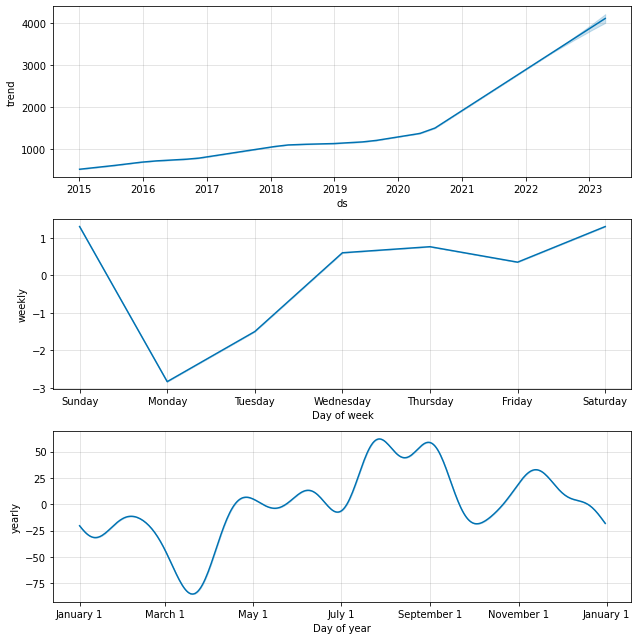

In [13]:
# pip install streamlit fbprophet yfinance plotly
import streamlit as st
from datetime import date

import yfinance as yf
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go

START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

st.title('Stock Forecast App')

stocks = ('GOOG', 'AAPL', 'MSFT', 'GME')
selected_stock = st.selectbox('Select dataset for prediction', stocks)

n_years = st.slider('Years of prediction:', 1, 4)
period = n_years * 365

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

	
data_load_state = st.text('Loading data...')
data = load_data(selected_stock)
data_load_state.text('Loading data... done!')

st.subheader('Raw data')
st.write(data.tail())

# Plot raw data
def plot_raw_data():
	fig = go.Figure()
	fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name="stock_open"))
	fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="stock_close"))
	fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
	st.plotly_chart(fig)
	
plot_raw_data()

# Predict forecast with Prophet.
df_train = data[['Date','Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

# Show and plot forecast
st.subheader('Forecast data')
st.write(forecast.tail())
    
st.write(f'Forecast plot for {n_years} years')
fig1 = plot_plotly(m, forecast)
st.plotly_chart(fig1)

st.write("Forecast components")
fig2 = m.plot_components(forecast)
st.write(fig2)

In [14]:
!streamlit run stock_pred_tutorial.py & npx localtunnel --port 8501

2022-04-03 02:50:59.046 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.245.71.157:8501

npx: installed 22 in 3.901s
your url is: https://calm-dolphin-31.loca.lt
[*********************100%***********************]  1 of 1 completed
2022-04-03 02:51:22.853 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Initial log joint probability = -26.9544
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5249.8    0.00242797       483.992           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5268.09    0.00146651       365.562       0.479       0.479      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     282       5275.96     4.811e-05  